In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib 
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd 
import time

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#get the info
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
#Path
train = get_training_data("/content/drive/My Drive/Dataset/Entrenamiento")
test = get_training_data("/content/drive/My Drive/Dataset/Examen")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


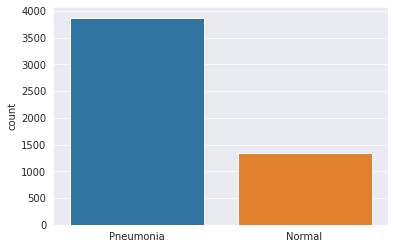

In [ ]:
#Diference 
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)   

In [ ]:
x_train = []
y_train = []


x_test = []
y_test = []

#Split 
for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)


In [ ]:
#Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
#Resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)
print(x_train) 

[[[[0.0627451 ]
   [0.0627451 ]
   [0.0627451 ]
   ...
   [0.56470588]
   [0.55686275]
   [0.50588235]]

  [[0.05098039]
   [0.05098039]
   [0.05098039]
   ...
   [0.62352941]
   [0.55294118]
   [0.49411765]]

  [[0.04313725]
   [0.04313725]
   [0.04313725]
   ...
   [0.61568627]
   [0.54117647]
   [0.50980392]]

  ...

  [[0.38039216]
   [0.49411765]
   [0.54901961]
   ...
   [0.07843137]
   [0.07843137]
   [0.09019608]]

  [[0.00784314]
   [0.48235294]
   [0.55686275]
   ...
   [0.07843137]
   [0.07843137]
   [0.00392157]]

  [[0.41176471]
   [0.50196078]
   [0.55686275]
   ...
   [0.07843137]
   [0.07843137]
   [0.08235294]]]


 [[[0.01176471]
   [0.01176471]
   [0.00784314]
   ...
   [0.64705882]
   [0.67058824]
   [0.63921569]]

  [[0.00392157]
   [0.00392157]
   [0.        ]
   ...
   [0.6745098 ]
   [0.67843137]
   [0.65882353]]

  [[0.00392157]
   [0.00784314]
   [0.05882353]
   ...
   [0.6745098 ]
   [0.6745098 ]
   [0.68627451]]

  ...

  [[0.07843137]
   [0.07843137]
   [0.0

In [ ]:
#Make a model
model = Sequential()
#Padding is a weight
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
#Rescaling of image for most speed 
model.add(BatchNormalization())
#Strides is a compression of maxpooling  
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)       

In [ ]:
#Patience is a Early stopping 
#Verbose is how i want see the train 

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)
model.fit(x_train,y_train, batch_size = 32 ,epochs = 12,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0178 - accuracy: 0.9946
Epoch 2/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0203 - accuracy: 0.9921
Epoch 3/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0213 - accuracy: 0.9916
Epoch 4/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0135 - accuracy: 0.9960
Epoch 5/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0220 - accuracy: 0.9941
Epoch 6/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 7/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0112 - accuracy: 0.9971
Epoch 8/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0162 - accuracy: 0.9958
Epoch 9/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0137 - accuracy: 0.9952
Epoch 10/12
163/163 [==============================] - 6s 34ms/step - loss: 0.0186 - accura

In [ ]:
Neumo= model.evaluate(x_test,y_test)[1]*100
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

1/1 [==============================] - 0s 20ms/step - loss: 0.1242 - accuracy: 0.9375
Loss of the model is -  0.1241588220000267
1/1 [==============================] - 0s 18ms/step - loss: 0.1242 - accuracy: 0.9375
Accuracy of the model is -  93.75 %


In [ ]:
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

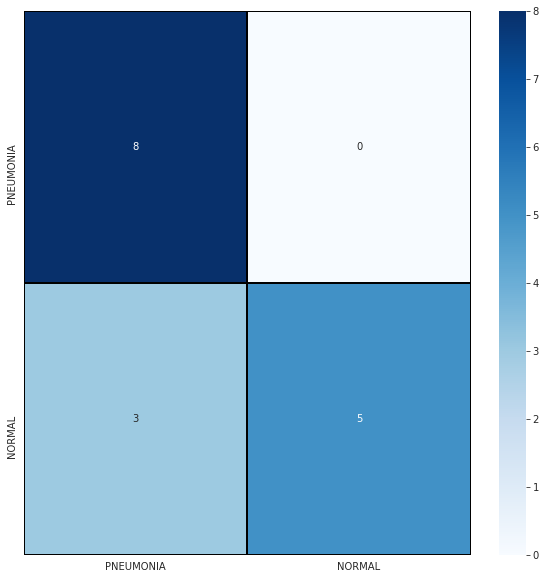

In [ ]:
cm = confusion_matrix(y_test,predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [ ]:
#save the model
model.save('Neumonia.h5')

In [ ]:
#recreate the struture of model
Modelagain = keras.models.load_model('Neumonia.h5')
Modelagain.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 38, 38, 64)       